In [1]:
import pandas as pd

df = pd.read_csv('IMDB-Movie-Data.csv')

In [2]:
df = df.drop(columns = ['Description', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore'])

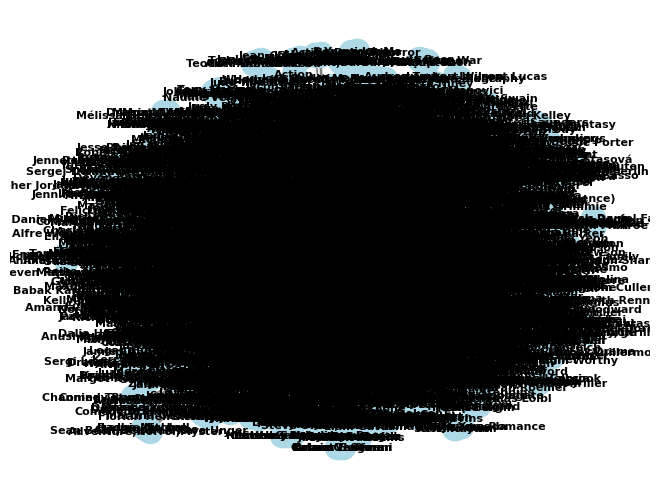

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()
count = 0

for _, row in df.iterrows():
    movie_name = row['Title']
    director = row['Director']
    actors = row['Actors'].split(', ') if isinstance(row['Actors'], str) else []
    genres = row['Genre'].split(', ') if isinstance(row['Genre'], str) else []
    year = row['Year']

    # Add movie node
    G.add_node(movie_name, node_type='movie')

    G.add_node(str(year), node_type='year')
    G.add_edge(movie_name, str(year), relation='released_in')


    # Connect movie node to director nodes
    G.add_node(director, node_type='director')
    G.add_edge(movie_name, director, relation='directed_by')

    # Connect movie node to genre nodes
    for genre_name in genres:
        G.add_node(genre_name, node_type='genre')
        G.add_edge(movie_name, genre_name, relation='genre_is')

    # Connect movie node to actor nodes
    for actor_name in actors:
        G.add_node(actor_name, node_type='actor')
        G.add_edge(movie_name, actor_name, relation='acted_in')
    count +=1
    # if(count == 10):
    #   break

# Draw the graph (optional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=300, node_color='lightblue', font_weight='bold', edge_color='gray', arrows=False)
plt.show()

In [4]:
input_file_path = 'dataset.txt'
# Read input file
with open(input_file_path, 'r') as file:
    content = file.read()

# Split by double newline to get question-answer pairs
pairs = content.split('\n\n')

In [5]:
questions = [pair.split('\n')[0] for pair in pairs]

In [5]:
# pip install spacy-transformers
# !pip install spacy -U

In [6]:
# python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_trf

In [8]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_trf")

In [9]:
question = "Can you name a film from 2015 with an ensemble cast, including a well-known actor named Tom Hardy?"
doc = nlp(question)

# Extract named entities from the question
named_entities = [entity.text for entity in doc.ents]

print(question)
print(named_entities)
# print(question_list[number])

related_nodes = set(list(G.nodes))
for entity in named_entities:
    current_entity_nodes = set()
    if entity in G.nodes:

      # if(G.nodes[entity]['node_type'] != 'movie'):
      #   for neighbor in list(G.neighbors(entity)):
      #     current_entity_nodes.update(list(G.neighbors(neighbor)))
      # else:
        current_entity_nodes.update(list(G.neighbors(entity)))

    related_nodes = current_entity_nodes & related_nodes
      # current_entity_nodes.update(list(G.neighbors(entity)))
        # related_nodes.extend(list(G.neighbors(entity)))  # Find neighboring nodes
        # related_nodes.append(entity)  # Include the named entity itself


# Remove duplicates from related nodes (if any)
related_nodes = list(related_nodes)

# Get information associated with related nodes in the graph
for node in related_nodes:
    # Retrieve information associated with the node from the graph
    node_info = G.nodes[node]  # Example function to retrieve node info
    print(f"Node: {node}, Info: {node_info}")

print()
# print(pairs[number].split('\n')[1])


Can you name a film from 2015 with an ensemble cast, including a well-known actor named Tom Hardy?
['2015', 'Tom Hardy']
Node: Mad Max: Fury Road, Info: {'node_type': 'movie'}
Node: Legend, Info: {'node_type': 'movie'}
Node: Child 44, Info: {'node_type': 'movie'}
Node: The Revenant, Info: {'node_type': 'movie'}



In [27]:
input_file_path = 'test.txt'
# Read input file
with open(input_file_path, 'r') as file:
    content = file.read()

# Split by double newline to get question-answer pairs
questions = content.split('Answers :')[0]
answers = content.split('Answers :')[1]

questions = questions.split('\n\n')[:-1]
answers = answers.split('\n')[1:-3]

In [42]:
answers = [s.split('"')[1] for s in answers]

In [47]:
predicted_answers = []
for question in questions:
    doc = nlp(question)

    # Extract named entities from the question
    named_entities = [entity.text for entity in doc.ents]

#     print(question)

    related_nodes = set(list(G.nodes))
    for entity in named_entities:
        current_entity_nodes = set()
        if entity in G.nodes:
            current_entity_nodes.update(list(G.neighbors(entity)))

        related_nodes = current_entity_nodes & related_nodes

    related_nodes = list(related_nodes)
    curr_ans = []
    for node in related_nodes:
        node_info = G.nodes[node]  # Example function to retrieve node info
        curr_ans.append(str(node))
#         print(f"Node: {node}, Info: {node_info}")

    predicted_answers.append(curr_ans[0:5])

In [49]:
total_count = 0
for i in range(20):
    if(answers[i] in predicted_answers[i]):
        total_count+=1
print("Precision : ",total_count/20)

Precision :  0.5


##

In [ ]:
# question = "What are the effects of climate change on polar bears and their habitats?"

# Process the question with spaCy
question_list = []

for question in questions:
    doc = nlp(question)

    # Extract named entities from the question
    named_entities = [(entity.text, entity.label_) for entity in doc.ents]

    question_list.append([entity for entity, _ in named_entities])

    # Print the identified named entities and their types
    for entity, entity_type in named_entities:
        print(f"Entity: {entity}, Type: {entity_type}", end="\n\n")

In [23]:
node_list = [node.lower() for node in G.nodes]

In [70]:
number = 13
named_entities = question_list[number]
print(questions[number])
print(question_list[number])

related_nodes = set(list(G.nodes))
for entity in named_entities:
    current_entity_nodes = set()
    if entity in G.nodes:

      if(G.nodes[entity]['node_type'] != 'movie'):
        for neighbor in list(G.neighbors(entity)):
          current_entity_nodes.update(list(G.neighbors(neighbor)))
      else:
        current_entity_nodes.update(list(G.neighbors(entity)))

    related_nodes = current_entity_nodes & related_nodes
      # current_entity_nodes.update(list(G.neighbors(entity)))
        # related_nodes.extend(list(G.neighbors(entity)))  # Find neighboring nodes
        # related_nodes.append(entity)  # Include the named entity itself


# Remove duplicates from related nodes (if any)
related_nodes = list(related_nodes)

# Get information associated with related nodes in the graph
for node in related_nodes:
    # Retrieve information associated with the node from the graph
    node_info = G.nodes[node]  # Example function to retrieve node info
    print(f"Node: {node}, Info: {node_info}")

print()
print(pairs[number].split('\n')[1])

In which year was the movie "The Girl on the Train" released with Emily Blunt?
['The Girl on the Train', 'Emily Blunt']
Node: Haley Bennett, Info: {'node_type': 'actor'}
Node: Justin Theroux, Info: {'node_type': 'actor'}
Node: 2016, Info: {'node_type': 'year'}
Node: Tate Taylor, Info: {'node_type': 'director'}
Node: Rebecca Ferguson, Info: {'node_type': 'actor'}
Node: Crime,Drama,Mystery, Info: {'node_type': 'genre'}
Node: Emily Blunt, Info: {'node_type': 'actor'}

Answer: 2016


In [67]:
list(G.neighbors("Emily Blunt"))

['The Girl on the Train',
 'Into the Woods',
 'Sicario',
 'Edge of Tomorrow',
 "The Huntsman: Winter's War",
 'The Devil Wears Prada',
 'Looper',
 'The Adjustment Bureau']

In [59]:
list(G.neighbors("Margot Robbie"))

['Suicide Squad', 'Focus', 'Whiskey Tango Foxtrot']

# Training

In [7]:
X = []
y = []
for pair in pairs:

  if(pair == ""):
    continue
  answer = pair.split('\n')[1].split("Answer: ")[1]
  if(answer not in G.nodes):
    continue
  X.append(pair.split('\n')[0])
  y.append(G.nodes[answer]['node_type'])

In [10]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
# from datasets import Dataset
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load a pre-trained LM tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the input data
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convert labels to numerical values (if necessary)
label_dict = {label: i for i, label in enumerate(set(y))}
y_train = [label_dict[label] for label in y_train]
y_test = [label_dict[label] for label in y_test]

# Convert tokenized inputs to PyTorch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(y_train)

test_inputs = torch.tensor(test_encodings['input_ids'])
test_masks = torch.tensor(test_encodings['attention_mask'])
test_labels = torch.tensor(y_test)

# Create DataLoader for train and test sets
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = TensorDataset(test_inputs, test_masks, test_labels)
test_loader = DataLoader(test_dataset, batch_size=8)

# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(y)))

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()
for epoch in range(3):  # Adjust number of epochs
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy: {accuracy}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\visha\anaconda3\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [11]:
label_reverse_dict = {}

In [12]:
for key in label_dict.keys():
    label_reverse_dict[label_dict[key]] = key

In [13]:
def find_answer_type(new_question, model):
  new_question = "Who is the president of the United States?"

  # Load the trained model and tokenizer
  # model = BertForSequenceClassification.from_pretrained('path_to_trained_model')  # Replace with your trained model path
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

  # Tokenize the new question
  tokenized_input = tokenizer(new_question, return_tensors='pt')

  model = model.to("cpu")

  # Forward pass through the model for inference
  with torch.no_grad():
      outputs = model(**tokenized_input)

  # Get the predicted label
  predicted_label = torch.argmax(outputs.logits).item()

  # Map the predicted label back to its original class
  # label_map = {0: 'location', 1: 'person'}  # Replace with your label mapping
  predicted_class = label_reverse_dict[predicted_label]
  return predicted_class

# print(f"Predicted class: {predicted_class}")

In [1]:
question = "Can you name a film from 2015 with an ensemble cast, including a well-known actor named Tom Hardy?"

answer_type = find_answer_type(question, model)
print(answer_type)
doc = nlp(question)

# Extract named entities from the question
named_entities = [entity.text for entity in doc.ents]

print(question)
print(named_entities)
# print(question_list[number])

related_nodes = set(list(G.nodes))
for entity in named_entities:
    current_entity_nodes = set()
    if entity in G.nodes:

      # if(G.nodes[entity]['node_type'] != 'movie'):
      #   for neighbor in list(G.neighbors(entity)):
      #     current_entity_nodes.update(list(G.neighbors(neighbor)))
      # else:
        current_entity_nodes.update(list(G.neighbors(entity)))

    related_nodes = current_entity_nodes & related_nodes
      # current_entity_nodes.update(list(G.neighbors(entity)))
        # related_nodes.extend(list(G.neighbors(entity)))  # Find neighboring nodes
        # related_nodes.append(entity)  # Include the named entity itself


# Remove duplicates from related nodes (if any)
related_nodes = list(related_nodes)

# Get information associated with related nodes in the graph
for node in related_nodes:
    # Retrieve information associated with the node from the graph
    node_info = G.nodes[node]  # Example function to retrieve node info
    print(f"Node: {node}, Info: {node_info}")

print()
# print(pairs[number].split('\n')[1])


NameError: ignored